In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [33]:
input_csv = "vidro-1kHz-40mBias7.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,719,511,1,5168
1,720,511,1,5168
2,721,511,1,5168
3,722,511,1,5168
4,723,511,1,5168


### Filter


In [34]:
%matplotlib inline
# Define the parameters
tmin = 1100000
tmax = 1100050
ymin = 118
ymax = 530
xmin = 720
xmax = 725
y = 500

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 972
             x    y  p        t
132676902  720  345  1  1100000
132676912  720  337  1  1100000
132676913  722  337  1  1100000
132676914  724  337  1  1100000
132676927  723  336  1  1100000
...        ...  ... ..      ...
132682821  724  338  0  1100050
132682849  720  329  1  1100050
132682860  720  328  1  1100050
132682861  722  328  1  1100050
132682862  724  328  1  1100050

[972 rows x 4 columns]
Time range: 1100000 to 1100050


### y FRINGES


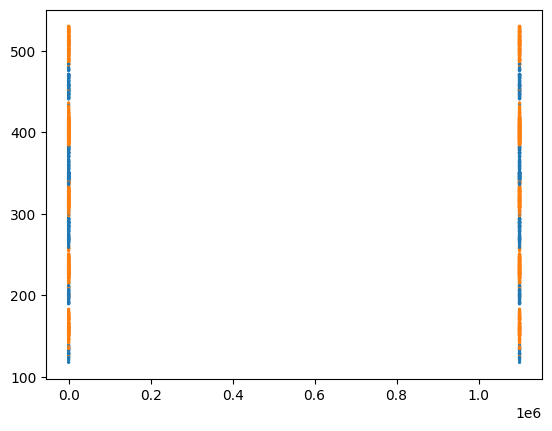

In [35]:
line_df['x'],line_df['y'],line_df['t'],line_df['p']

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
t = np.array(t)
p = np.array(p)

splity = 50
#y = np.mod(y, splity)
pos = 1*np.ones(len(t))
plt.scatter(pos, y, s=2, c=colors_vec)
plt.scatter(t, y, s=2, c=colors_vec)


In [36]:
idx

array([      0,      13,      12, ..., 3884350, 3884357, 3884358],
      dtype=int64)

### Finding split zones

array([ 94, 231, 368, 562], dtype=int64)

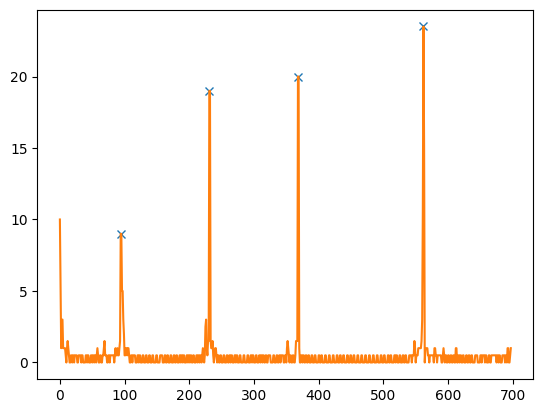

In [37]:
idx = np.argsort(y)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

yp = y[p==1]
yn = y[p==0]
split_idx = np.where(np.diff(yp)>5)
gradyp = np.gradient(yp)
from scipy.signal import find_peaks

peaksidx, _ = find_peaks(gradyp, distance=100, prominence=2)

plt.plot(peaksidx, abs(gradyp[peaksidx]), "x")

plt.plot(gradyp)
#plt.plot(np.diff(yn))
peaksidx



### centroid of fringes and determination of phase per pixel

[160.45744680851064, 233.3065693430657, 320.007299270073, 403.41237113402065, 507.75735294117646] [ 72.84912253  86.70072993  83.40507186 104.34498181]


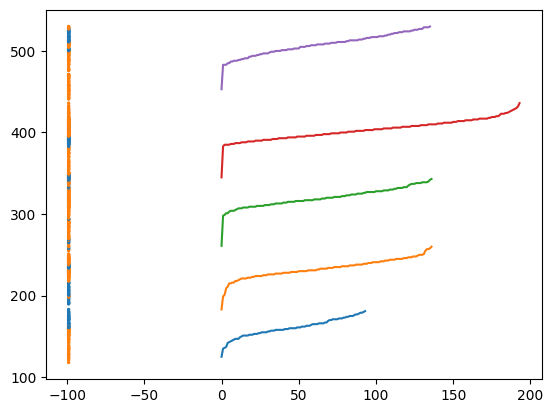

In [38]:
plt.scatter(pos-100, y, s=2, c=colors_vec)

centroids = []
for yvals in np.split(yp, peaksidx):
    plt.plot(yvals)

    centroids.append(np.mean(yvals))

print(centroids,np.diff(centroids))

pixels_per_period = 85
phaseperpixel = 2*np.pi/pixels_per_period

### filter data

In [39]:
%matplotlib inline
# Define the parameters
tmin = 1100000
tmax = 1150000
tmax = 2000000
ymin = 200
ymax = 390
ymax = 450
xmin = 720
xmax = 725
y = 500

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 3884359
             x    y  p        t
132676902  720  345  1  1100000
132676912  720  337  1  1100000
132676913  722  337  1  1100000
132676914  724  337  1  1100000
132676927  723  336  1  1100000
...        ...  ... ..      ...
167101239  725  205  0  1384249
167101240  722  205  1  1384249
167101241  723  205  1  1384249
167101442  720  448  0  1384254
167101459  720  450  0  1384254

[3884359 rows x 4 columns]
Time range: 1100000 to 1384254


### phase per pixel method application

(0.0, 2000.0)

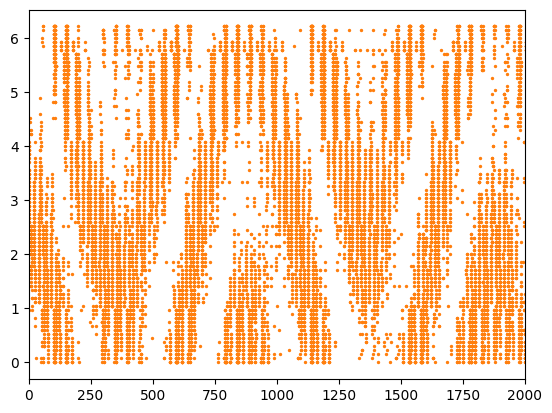

In [40]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]


tp = tp-tp[0]

yp = yp-ymin
yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

phase = yp*phaseperpixel
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,2000)

In [41]:
np.mod(-0.8, (-0.5,1))

np.angle(1+1j, deg=True)

45.0

### Calculation of phase (centroids)

In [42]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [43]:
centroid_y,tval_vec

(array([-2.29273528, -2.85372336,  2.84121634, ...,  2.31610456,
         2.51327412,  0.87948161]),
 array([   0,    1,    2, ..., 9544, 9545, 9547], dtype=int64))

### phases of events over time

(0.0, 2000.0)

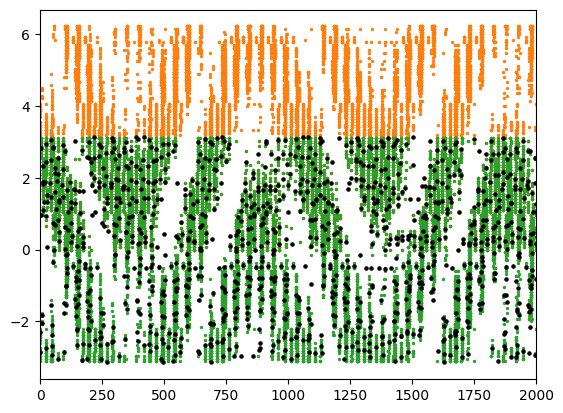

In [44]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

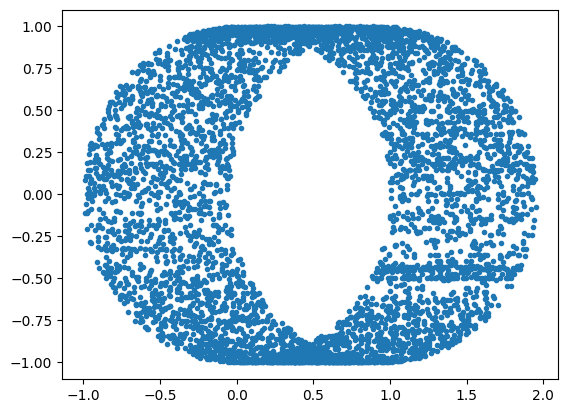

In [45]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')


### Kalman filter to smooth the phase data derived from the centroid phases

(0.0, 2000.0)

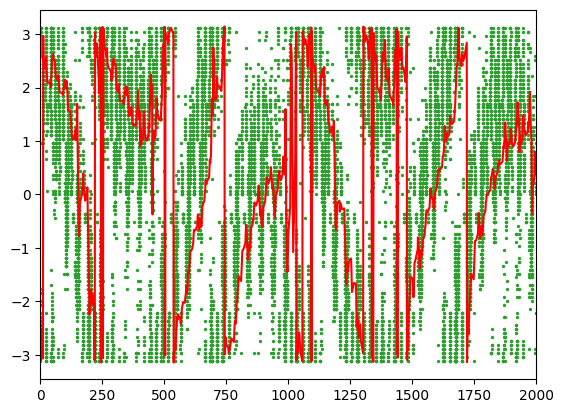

In [46]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.1+0.1j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

(0.0, 2000.0)

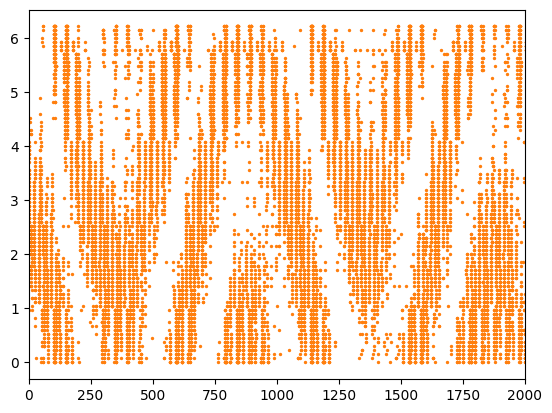

In [47]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]


tp = tp-tp[0]

yp = yp-ymin
yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

phase = yp*phaseperpixel
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,2000)

12.279890995313758

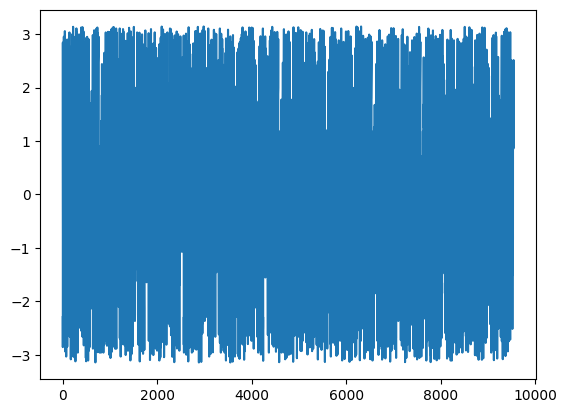

In [48]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()



### Phase Unwrapping and Continuous Phase Analysis


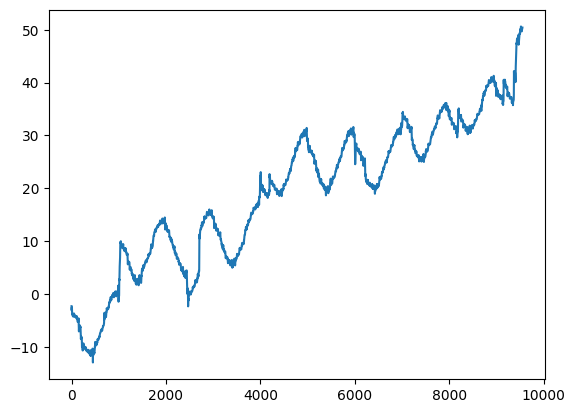

In [49]:

centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)



In [50]:
from scipy.signal import butter, filtfilt
import numpy as np

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

(0.0, 10.0)

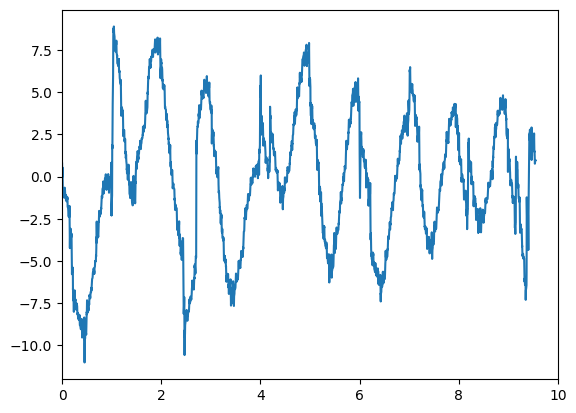

In [51]:
fs = 1000e3
cutoff = 500
f = 100

#t = np.arange((len(centroid_y)))/fs
filt_centroid = butter_highpass_filter(centroid_y, cutoff, fs,)

#plt.plot(tval_vec/1000, centroid_y)
plt.plot(tval_vec/1000, filt_centroid)
plt.xlim(0,10)

(-5000.0, 5000.0)

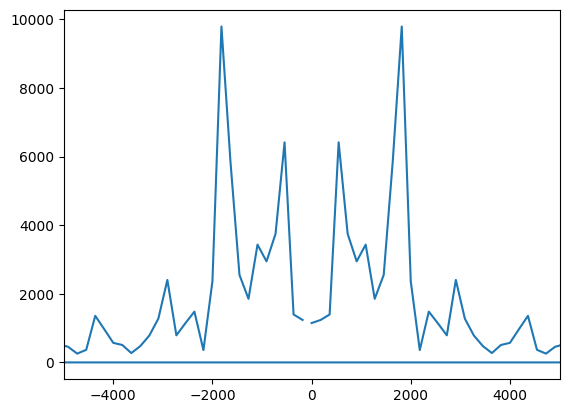

In [52]:
ft = np.fft.fft(filt_centroid)
freqs = np.fft.fftfreq(len(filt_centroid), d=1/fs)

plt.plot(freqs,abs(ft))

plt.xlim(-5000,5000)

### displacement

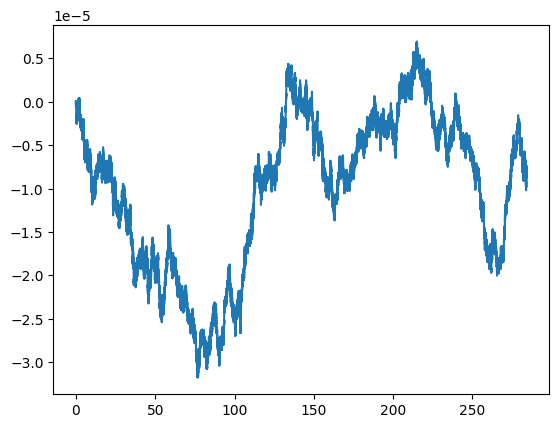

In [53]:
phase_diff = np.append([0], np.diff(phase))

phase_diff = np.unwrap(phase_diff)
wavelength = 532e-9
displacement = phase_diff/(2*np.pi)*wavelength/2

plt.plot((tp-tp[0])/1000, displacement)

(0.0, 0.1)

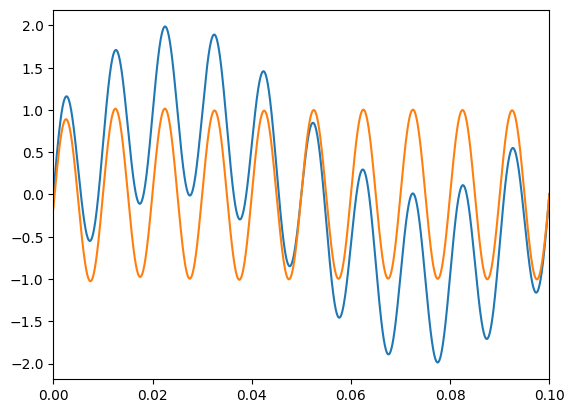

In [54]:
fs = 100e3
cutoff = 25
f = 100

t = np.arange((len(displacement)))/fs
yest = np.sin(2*np.pi*f*t) + np.sin(2*np.pi*10*t) 
#filt_displacement = butter_highpass_filter(displacement, cutoff, fs,)
yestfilt = butter_highpass_filter(yest, cutoff, fs,)

plt.plot(t, yest)
plt.plot(t, yestfilt)
plt.xlim(0,0.1)

In [55]:
np.diff(tp).max()

17

In [56]:
chunk = line_df
# Apply time filtering if specified
if tmin is not None:
    chunk = chunk[chunk['t'] >= tmin]
if tmax is not None:
    chunk = chunk[chunk['t'] <= tmax]

# Apply polarity filtering if specified
if polarity is not None:
    chunk = chunk[chunk['p'] == polarity]

# Filter the DataFrame based on the specified x and y range
chunk = chunk[(chunk['x'] >= xmin) & (chunk['x'] <= xmax) & (chunk['y'] >= ymin) & (chunk['y'] <= ymax)]




chunk_size = 1000000  # Adjust chunk size based on your system's memory
chunks = []

# Read the CSV file in chunks
for chunk in pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'], chunksize=chunk_size):
    chunk = process_chunk(chunk, xmin, xmax, ymin, ymax, tmin, tmax, polarity)
    chunks.append(chunk)

# Concatenate all processed chunks
df = pd.concat(chunks, ignore_index=True)

# Debug: Print the first few rows after filtering
print("Filtered data:")
print(df.head())

# Check if the filtered DataFrame is empty
if df.empty:
    print("No events found for the given filters.")


# Reset DataFrame index
df.reset_index(drop=True, inplace=True)

# Create bins for time and y values
time_bins = np.linspace(df['t'].min(), df['t'].max(), num=500)
y_bins = np.arange(ymin, ymax + 1)

# Create a 2D histogram for density calculation
heatmap, xedges, yedges = np.histogram2d(df['t'], df['y'], bins=[time_bins, y_bins])

# Flatten the heatmap to get a list of densities
densities = heatmap.T.flatten()
densities = densities / densities.max() if densities.max() != 0 else densities  # Normalize densities

# Ensure the index calculation fits within the density array bounds
time_indices = np.digitize(df['t'], bins=time_bins) - 1
y_indices = np.digitize(df['y'], bins=y_bins) - 1

# Clip the indices to ensure they are within bounds
time_indices = np.clip(time_indices, 0, heatmap.shape[1] - 1)
y_indices = np.clip(y_indices, 0, heatmap.shape[0] - 1)

# Create a valid density index for each event
density_indices = np.ravel_multi_index((y_indices, time_indices), heatmap.shape)
density_indices = np.clip(density_indices, 0, densities.size - 1)  # Ensure all indices are within bounds

# Debugging information
print(f"Number of events: {len(df)}")
print(f"Density array shape: {densities.shape}")
print(f"Density indices shape: {density_indices.shape}")
print(f"Max density index: {density_indices.max()}")
print(f"Min density index: {density_indices.min()}")
print(f"Densities size: {densities.size}")
print(f"Density indices (first 10): {density_indices[:10]}")

# Plot the polarities over time with point sizes based on density
plt.figure(figsize=(10, 6))
colors = ["C0", "C1"]
for y in range(ymax, ymin - 1, -1):
    line_df = df[df['y'] == y]
    if len(line_df) == 0:
        continue

    # Adjust indices to ensure they are within bounds
    line_indices = line_df.index.to_numpy()
    valid_indices = density_indices[line_indices]

    # Debugging information inside the loop
    print(f"Processing y={y}")
    print(f"Line df indices (first 10): {line_indices[:10]}")
    print(f"Valid density indices (first 10): {valid_indices[:10]}")

    # Clip valid_indices to avoid out-of-bounds error
    valid_indices = np.clip(valid_indices, 0, densities.size - 1)
    point_sizes = np.clip(densities[valid_indices], 0.05, 5)  # Smaller point sizes
    colors_vec = [colors[p] for p in line_df['p']]
    plt.scatter(line_df['t'], line_df['y'], s=point_sizes, c=colors_vec)

plt.xlabel('Time (t)')
plt.ylabel('Y coordinate')
plt.title(f'Polarities of Horizontal Lines from y={ymin} to y={ymax} Over Time')
plt.grid(True)
plt.show()


#plt.switch_backend("QtAgg4")
#plt.show()

NameError: name 'polarity' is not defined

### Failed attempt of fitting


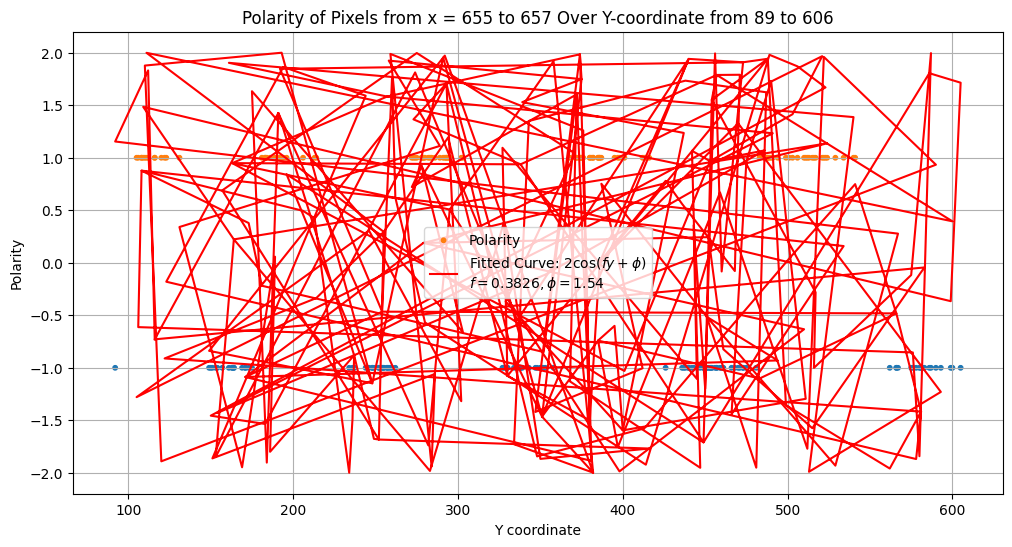

Fitting parameters:
f = 0.38260243578805786
phi = 1.5443063615193537


In [ ]:
# Extract y and p_numeric values
y_values = line_df['y'].values
p_values = line_df['p_numeric'].values

# Perform FFT
fft_result = np.fft.fft(p_values)
fft_freq = np.fft.fftfreq(len(p_values), d=(y_values[1] - y_values[0]))  # Assuming uniform spacing

# Find the dominant frequency
dominant_freq = np.abs(fft_freq[np.argmax(np.abs(fft_result))])

# Define the cosine function to fit
def cosine_function(y, f, phi):
    A = 2  # Fixed amplitude
    return A * np.cos(f * y + phi)

# Initial guess for the parameters [f, phi]
initial_guess = [2 * np.pi * dominant_freq, 0]

# Fit the curve
params, covariance = curve_fit(cosine_function, y_values, p_values, p0=initial_guess)

# Extract the fitting parameters
f, phi = params

# Generate fitted curve
fitted_p = cosine_function(y_values, f, phi)

# Plot the original data and the fitted curve
plt.figure(figsize=(12, 6))
plt.scatter(y_values, p_values, s=10, c=colors_vec, label='Polarity')
plt.plot(y_values, fitted_p, label=f'Fitted Curve: $2 \\cos(fy + \\phi)$\n$f={f:.4f}, \\phi={phi:.2f}$', color='red')

plt.xlabel('Y coordinate')
plt.ylabel('Polarity')
plt.title(f'Polarity of Pixels from x = {xmin} to {xmax} Over Y-coordinate from {ymin} to {ymax}')
plt.legend()
plt.grid(True)
plt.show()

# Debug: Print the fitting parameters
print("Fitting parameters:")
print(f"f = {f}")
print(f"phi = {phi}")


### Function for plotting polarity of individual pixel over a number of pixels

In [ ]:
def plot_polarity_individual(df, y_range, x_start, x_end, tmin=1250000, tmax=1500000):
    num_plots = x_end - x_start + 1
    fig, axs = plt.subplots(num_plots, 1, sharex=True, sharey=True, figsize=(12, num_plots * 4))
    
    for i in range(num_plots):
        ax = axs[i] if num_plots > 1 else axs
        pixel_x = x_start + i
        
        # Filter the DataFrame for the specified x-coordinate and y-coordinate range
        pixel_df = df[(df['x'] == pixel_x) & (df['y'] >= y_range[0]) & (df['y'] <= y_range[1])]
        
        # Apply time filtering if specified
        if tmin is not None:
            pixel_df = pixel_df[pixel_df['t'] >= tmin]
        if tmax is not None:
            pixel_df = pixel_df[pixel_df['t'] <= tmax]

        # Convert polarity to 1 or -1 for fitting
        pixel_df['p_numeric'] = pixel_df['p'].apply(lambda p: 1 if p == 1 else -1)
        
        # Define colors for polarity
        colors = ["C0", "C1"]
        colors_vec = [colors[p] for p in pixel_df['p']]
        
        # Plot the polarity as a function of y-coordinate
        ax.scatter(pixel_df['y'], pixel_df['p_numeric'], s=10, c=colors_vec, label=f'Pixel {pixel_x}')
        ax.set_ylabel('Polarity')
        ax.legend()
        ax.grid(True)
    
    plt.xlabel('Y coordinate')
    fig.suptitle(f'Polarity of Individual Pixels Over Y-coordinate {y_range[0]}-{y_range[1]}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()


### Calling the function above

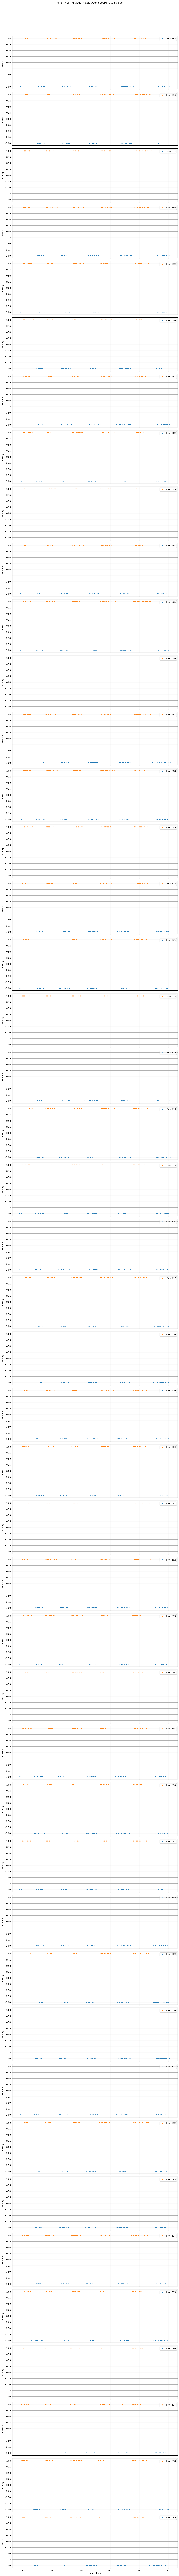

In [ ]:
# Define the parameters for plotting individual pixels
ymin = 89
ymax = 606
x_start = 655
x_end = 699  # Adjust this range as needed to cover all your data

# Call the function to plot the polarity graphs
plot_polarity_individual(df, (ymin, ymax), x_start, x_end, tmin, tmax)

In [ ]:
# Define the parameters
tmin = 1100000
twindow = 300
tmax = tmin+twindow
ymin = 89
ymax = 606
xmin = 655
xmax = 699
y = 500

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()

Number of data points: 3338
            x    y  p        t
23716849  661  193  1  1100000
23716850  659  199  1  1100000
23716851  685  198  1  1100000
23716852  666  197  1  1100000
23716853  678  204  1  1100000
...       ...  ... ..      ...
23720449  657  351  0  1100300
23720450  669  351  0  1100300
23720451  680  281  1  1100300
23720452  657  278  1  1100300
23720453  658  148  0  1100300

[3338 rows x 4 columns]
Time range: 1100000 to 1100300


### plotting individual pixel

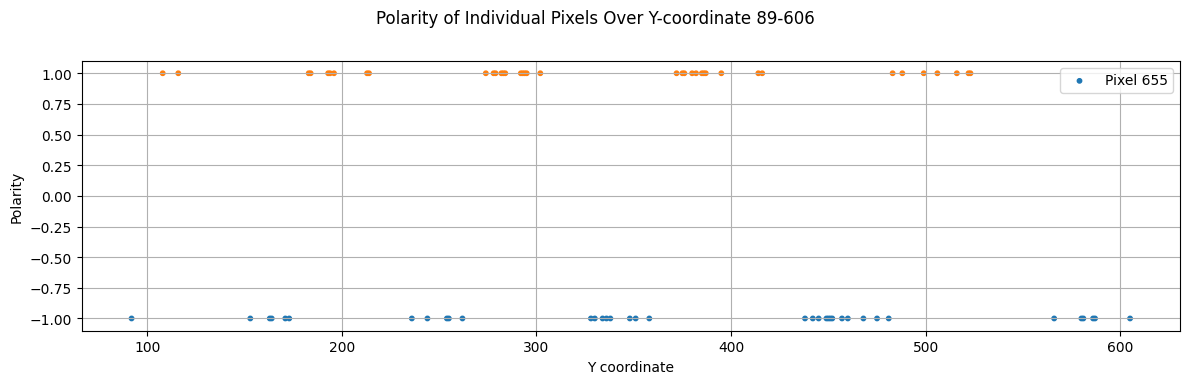

In [ ]:
# Define the parameters for plotting individual pixels
ymin = 89
ymax = 606
x_start = 655
x_end = 699  # Adjust this range as needed to cover all your data

# Call the function to plot the polarity graphs
num_plots = x_end - x_start + 1
num_plots = 1
y_range = (ymin, ymax)
fig, axs = plt.subplots(num_plots, 1, sharex=True, sharey=True, figsize=(12, num_plots * 4))

for i in range(num_plots):
    ax = axs[i] if num_plots > 1 else axs
    #ax = axs[0]
    pixel_x = x_start + i
    
    # Filter the DataFrame for the specified x-coordinate and y-coordinate range
    pixel_df = df[(df['x'] == pixel_x) & (df['y'] >= y_range[0]) & (df['y'] <= y_range[1])]
    
    # Apply time filtering if specified
    if tmin is not None:
        pixel_df = pixel_df[pixel_df['t'] >= tmin]
    if tmax is not None:
        pixel_df = pixel_df[pixel_df['t'] <= tmax]

    # Convert polarity to 1 or -1 for fitting
    pixel_df['p_numeric'] = pixel_df['p'].apply(lambda p: 1 if p == 1 else -1)
    
    # Define colors for polarity
    colors = ["C0", "C1"]
    colors_vec = [colors[p] for p in pixel_df['p']]
    
    # Plot the polarity as a function of y-coordinate
    ax.scatter(pixel_df['y'], pixel_df['p_numeric'], s=10, c=colors_vec, label=f'Pixel {pixel_x}')
    ax.set_ylabel('Polarity')
    ax.legend()
    ax.grid(True)

plt.xlabel('Y coordinate')
fig.suptitle(f'Polarity of Individual Pixels Over Y-coordinate {y_range[0]}-{y_range[1]}')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### interpolation of a polarity of a pixel

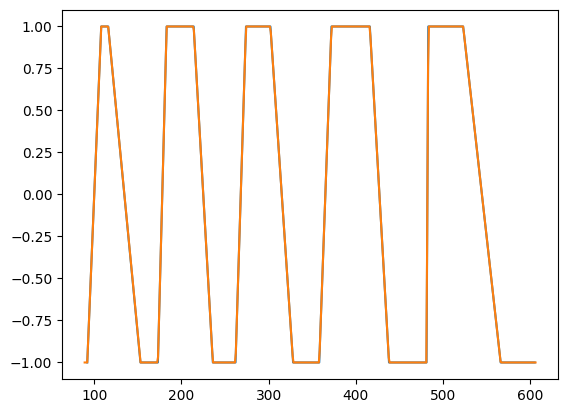

In [ ]:

y, p = pixel_df['y'], pixel_df['p_numeric']

idx = np.argsort(y)
y = np.array(y)[idx]
p = np.array(p)[idx]

int_y = np.linspace(ymin, ymax, int(ymax-ymin))
int_p = np.interp(int_y, y,p, )


plt.plot(y, p)
plt.plot(int_y, int_p)

### FFT of polarity (time to frequency) and finding its peak


C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


(array([ 5, 22, 34], dtype=int64),
 array([-0.36551097,  0.42233666, -0.48984722]))

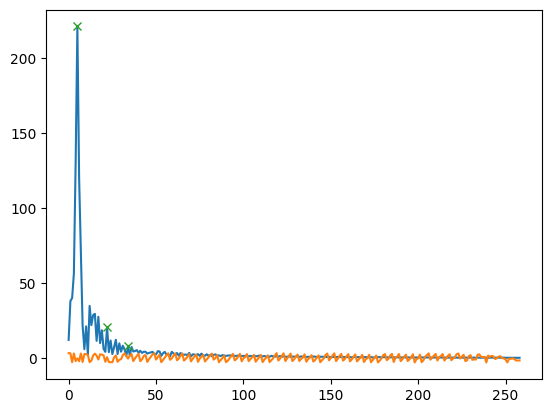

In [ ]:
from scipy.signal import find_peaks

ft = np.fft.rfft(int_p)

peaksidx, _ = find_peaks(ft, distance=10, prominence=10)

plt.plot(abs(ft))

plt.plot(np.angle(ft))
plt.plot(peaksidx, abs(ft[peaksidx]), "x")
phase = np.angle(ft[peaksidx])
peaksidx, phase

#### combined moving time window of polarity and finding the peaks of its ffts


KeyboardInterrupt: 

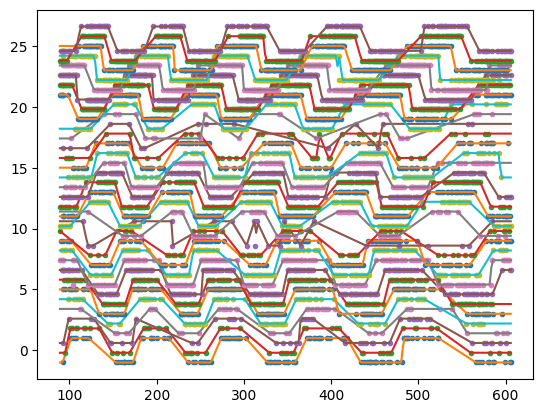

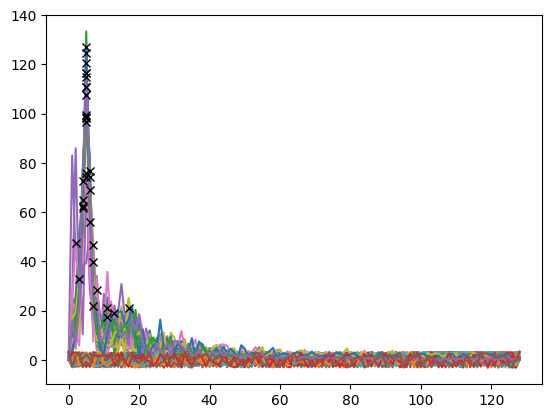

In [ ]:
# Define the parameters


ymin = 89
ymax = 606

xmin = 655
xmax = 699
y = 500

t_start = 1100000
t_end = 1150000
t_end = 1110000
t_end = 1140000
t_window = 500
t_step = 500
x_start = 655
x_end = 699  # Adjust this range as needed to cover all your data


phase_vec = []
t_vec = []
for i,tmin in enumerate(list(np.arange(t_start, t_end, t_step))):
    tmax = tmin+t_window

    

    # Filter the DataFrame for the specified horizontal line of pixels
    line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

    # Apply time filtering if specified
    if tmin is not None:
        line_df = line_df[line_df['t'] >= tmin]
    if tmax is not None:
        line_df = line_df[line_df['t'] <= tmax]

    # Check if the filtered DataFrame is empty
    if line_df.empty:
        continue
    #   print("No data points found for the given filters.")
    else:
        #print(f"Number of data points: {len(line_df)}")
        #print(line_df)
        #print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
        line_df.head()


  

    # Call the function to plot the polarity graphs

    y_range = (ymin, ymax)
    
    pixel_x = x_start

    # Filter the DataFrame for the specified x-coordinate and y-coordinate range
    pixel_df = df[(df['x'] == pixel_x) & (df['y'] >= y_range[0]) & (df['y'] <= y_range[1])]

    # Apply time filtering if specified
    if tmin is not None:
        pixel_df = pixel_df[pixel_df['t'] >= tmin]
    if tmax is not None:
        pixel_df = pixel_df[pixel_df['t'] <= tmax]

    # Convert polarity to 1 or -1 for fitting
    pixel_df['p_numeric'] = pixel_df['p'].apply(lambda p: 1 if p == 1 else -1)




        
    y, p = pixel_df['y'], pixel_df['p_numeric']

    all_y = np.arange(ymin, ymax+1, 1)
    fringe_vec = np.zeros(len(all_y))

    idx = np.argsort(y)
    y = np.array(y)[idx]
    p = np.array(p)[idx]


    for idx in range(len(y)):
        fringe_vec[y[idx]-ymin] += p[idx]

    all_y, y-ymin,fringe_vec
    
    if 0:
        y = all_y
        p = fringe_vec

    #int_y = np.linspace(ymin, ymax, int(ymax-ymin))
    int_y = np.linspace(ymin, ymax, 256)


    try:
        int_p = np.interp(int_y, y,p, )

    except:
        print("failed",i)
        continue

        
    plt.figure(1)
    offset = i*0.8
    plt.plot(y, p+offset, ".")
    plt.plot(int_y, int_p+offset)

    int_p -= np.mean(int_p)

    ft = np.fft.rfft(int_p)

    #peaksidx, _ = find_peaks(ft, distance=10, prominence=10)
    peaksidx = np.argmax(ft)

    plt.figure(2)
    plt.plot(abs(ft))

    plt.plot(np.angle(ft))
    plt.plot(peaksidx, abs(ft[peaksidx]), "kx", zorder=100)


    phase = np.angle(ft[peaksidx])
    peaksidx, phase

    # if len(phase)==0:
    #     phase = np.nan
    #     continue
    # else:
    #     phase = phase[0]

    t_vec.append(tmin)
    phase_vec.append(phase)


In [ ]:
phase_vec

[0.867921898014959,
 1.4292235535822992,
 0.029277602047464553,
 -0.19209907067260365,
 -0.6199226659107232,
 -0.3946254623969573,
 0.45961300488759305,
 -0.3729385956081286,
 -0.3939542183797775,
 -0.3239511103810837,
 -0.17523972135108676,
 -0.07874300641232072,
 -0.6402366328584134,
 0.6867726510020656,
 0.059945865211072154,
 0.5085615554180118,
 1.2590603509039269,
 1.403880960402838,
 1.1465859838388255,
 0.9124482247659348,
 -0.028299941014656473,
 -0.03806757406694089,
 0.2961283204384169,
 -0.5532113376624349,
 -0.7013761810052485,
 -0.35141563752498717,
 -0.35611046522295914,
 1.1124207077532198,
 0.536808731961772,
 0.07410133893362955,
 -0.0018825793011482803,
 -0.8270968538349048,
 -0.49224734973976547,
 0.5373022058587784,
 -0.02289891376334268,
 -1.044078199929328,
 0.2119849523513982,
 -0.2322553855881242,
 -1.1157804565824558,
 -0.9301223878718743]

### plot of phase over time


array([ 0.56130166, -0.41932215, -0.81066131, -0.32460013, -0.1012632 ,
        0.53976784,  0.01084343, -0.42678361,  0.02449374,  0.10935725,
        0.12260405, -0.23249846,  0.38275783,  0.35009125, -0.08910555,
        0.59955724,  0.4476597 , -0.05623718, -0.24571637, -0.58744296,
       -0.4752579 ,  0.16221413, -0.25757188, -0.49875225,  0.10089785,
        0.17263286,  0.73191817,  0.4464596 , -0.51915968, -0.26934566,
       -0.4505991 , -0.24518239,  0.68219953,  0.23467422, -0.7906902 ,
        0.11744193,  0.40591141, -0.6638827 , -0.3489335 ,  0.19835711,
        0.79675507,  0.62671957, -0.70172061, -0.36072352,  0.88276409,
        0.18628055, -0.81686541, -0.61660181,  0.19034782,  0.4346924 ,
       -0.13715984,  0.40240187,  0.10222793, -0.1220307 , -0.09296413,
       -0.58258511,  0.62486153,  0.19026919, -0.86879972, -0.1191307 ,
        0.48674789,  0.73982043,  0.65125974, -0.66505321, -0.91984315,
        0.16858128,  0.27260384, -0.18310293, -0.13023713,  0.46

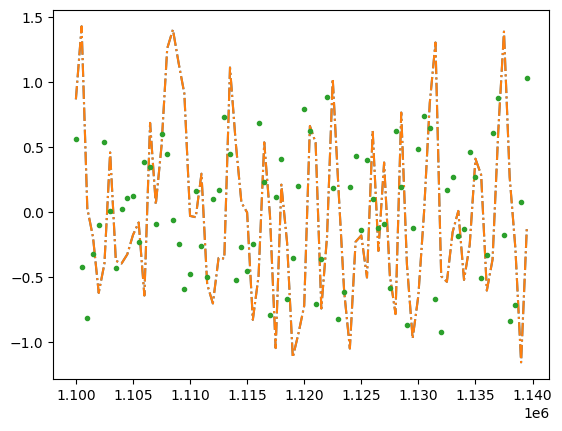

In [ ]:
unwrap = np.unwrap(phase_vec)
plt.plot(t_vec, phase_vec,'-.')
plt.plot(t_vec, unwrap,'-.')

phase_diff = np.gradient(unwrap)
t_vec, phase_vec
plt.plot(t_vec, phase_diff,'.')

phase_diff 

### Plot of distance over time

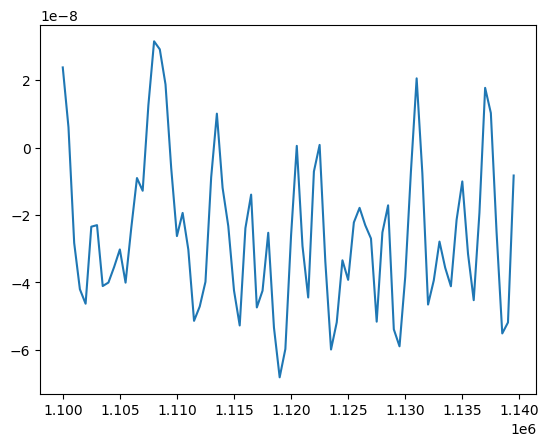

In [ ]:
phase_accum = np.nancumsum(phase_diff)
wavelength = 532e-9
distance = phase_accum/(2*np.pi)*wavelength/2

plt.plot(t_vec, distance)

### another plot of distance over time but with a larger window

array([    4.1887902 ,     5.02654825,     5.44542727, ...,
       -1007.82292327, -1008.24180229, -1009.49843935])

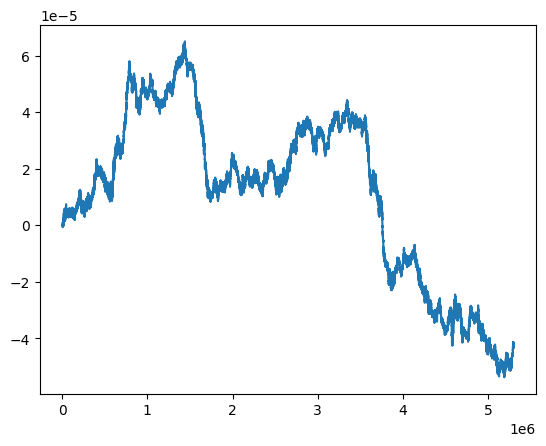

In [ ]:
# Define the parameters


ymin = 490
ymax = 505
xmin = 390
xmax = 392
y = 500

t_start = 1100000
t_end = 1150000
t_end = 1110000
t_end = 1140000
t_window = 500
t_step = 500
x_start = 390
x_end = 399  # Adjust this range as needed to cover all your data




    # Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

t = line_df['t']
phase = (line_df['y']-ymin)/(ymax-ymin)*2*np.pi
phase = (line_df['y']-ymin)/(ymax-ymin)*2*np.pi

phase = np.unwrap(phase)

#phase = np.gradient(phase)

distance = phase/(2*np.pi)*wavelength/2

plt.plot(t,distance)
phase

### test


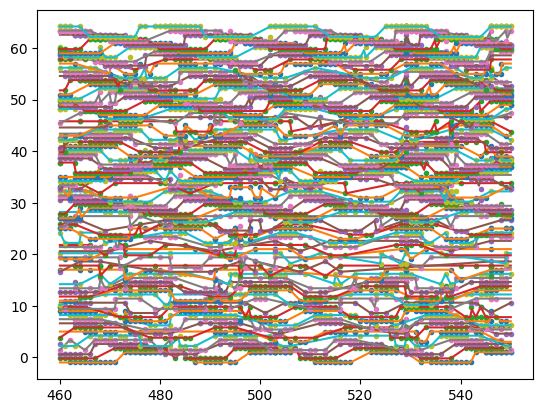

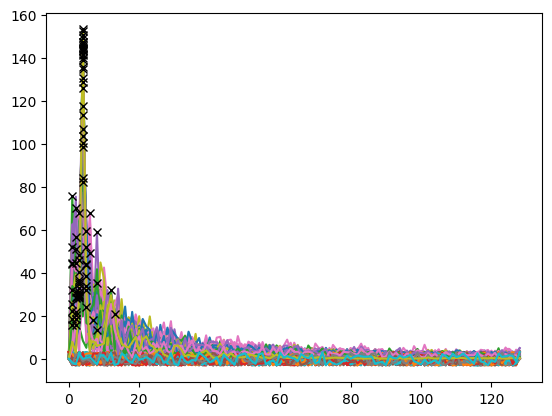

In [ ]:

phase_vec = []
t_vec = []
for i,tmin in enumerate(list(np.arange(t_start, t_end, t_step))):
    tmax = tmin+t_window

    

    # Filter the DataFrame for the specified horizontal line of pixels
    line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

    # Apply time filtering if specified
    if tmin is not None:
        line_df = line_df[line_df['t'] >= tmin]
    if tmax is not None:
        line_df = line_df[line_df['t'] <= tmax]

    # Check if the filtered DataFrame is empty
    if line_df.empty:
        continue
    #   print("No data points found for the given filters.")
    else:
        #print(f"Number of data points: {len(line_df)}")
        #print(line_df)
        #print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
        line_df.head()


  

    # Call the function to plot the polarity graphs

    y_range = (ymin, ymax)
    
    pixel_x = x_start

    # Filter the DataFrame for the specified x-coordinate and y-coordinate range
    pixel_df = df[(df['x'] == pixel_x) & (df['y'] >= y_range[0]) & (df['y'] <= y_range[1])]

    # Apply time filtering if specified
    if tmin is not None:
        pixel_df = pixel_df[pixel_df['t'] >= tmin]
    if tmax is not None:
        pixel_df = pixel_df[pixel_df['t'] <= tmax]

    # Convert polarity to 1 or -1 for fitting
    pixel_df['p_numeric'] = pixel_df['p'].apply(lambda p: 1 if p == 1 else -1)




        
    y, p = pixel_df['y'], pixel_df['p_numeric']

    all_y = np.arange(ymin, ymax+1, 1)
    fringe_vec = np.zeros(len(all_y))

    idx = np.argsort(y)
    y = np.array(y)[idx]
    p = np.array(p)[idx]


    for idx in range(len(y)):
        fringe_vec[y[idx]-ymin] += p[idx]

    all_y, y-ymin,fringe_vec
    
    if 0:
        y = all_y
        p = fringe_vec

    #int_y = np.linspace(ymin, ymax, int(ymax-ymin))
    int_y = np.linspace(ymin, ymax, 256)


    try:
        int_p = np.interp(int_y, y,p, )

    except:
        print("failed",i)
        continue

        
    plt.figure(1)
    offset = i*0.8
    plt.plot(y, p+offset, ".")
    plt.plot(int_y, int_p+offset)

    int_p -= np.mean(int_p)

    ft = np.fft.rfft(int_p)

    #peaksidx, _ = find_peaks(ft, distance=10, prominence=10)
    peaksidx = np.argmax(ft)

    plt.figure(2)
    plt.plot(abs(ft))

    plt.plot(np.angle(ft))
    plt.plot(peaksidx, abs(ft[peaksidx]), "kx", zorder=100)


    phase = np.angle(ft[peaksidx])
    peaksidx, phase

    # if len(phase)==0:
    #     phase = np.nan
    #     continue
    # else:
    #     phase = phase[0]

    t_vec.append(tmin)
    phase_vec.append(phase)


C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


(array([ 4, 21], dtype=int64), array([-0.12377386, -0.03832724]))

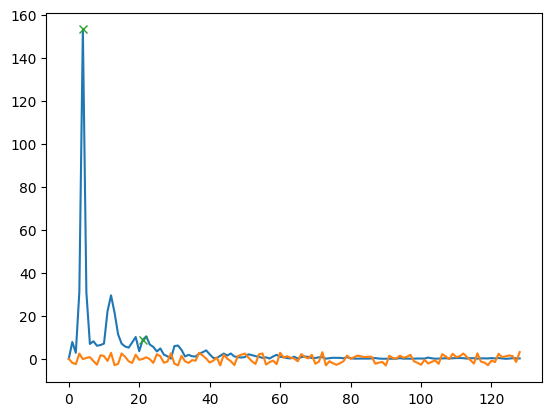

In [ ]:
from scipy.signal import find_peaks

ft = np.fft.rfft(int_p)

peaksidx, _ = find_peaks(ft, distance=10, prominence=10)

plt.plot(abs(ft))

plt.plot(np.angle(ft))
plt.plot(peaksidx, abs(ft[peaksidx]), "x")
phase = np.angle(ft[peaksidx])
peaksidx, phase

C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\

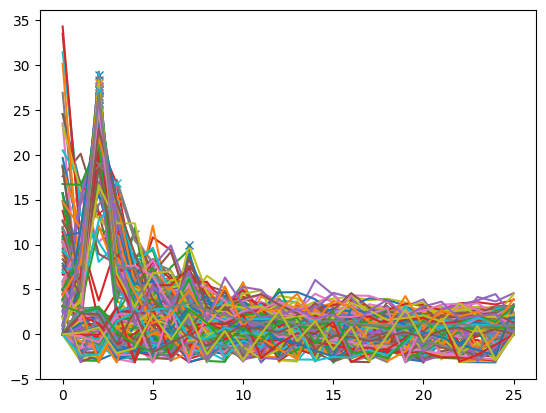

In [ ]:
# Define the parameters


ymin = 500
ymax = 550
xmin = 390
xmax = 392
y = 500

t_start = 1100000
t_end = 1150000
t_window = 500
t_step = 500
x_start = 390
x_end = 399  # Adjust this range as needed to cover all your data


phase_vec = []
t_vec = []
for tmin in list(np.arange(t_start, t_end, t_step)):
    tmax = tmin+t_window

    

    # Filter the DataFrame for the specified horizontal line of pixels
    line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

    # Apply time filtering if specified
    if tmin is not None:
        line_df = line_df[line_df['t'] >= tmin]
    if tmax is not None:
        line_df = line_df[line_df['t'] <= tmax]

    # Check if the filtered DataFrame is empty
    if line_df.empty:
        continue
    #   print("No data points found for the given filters.")
    else:
        #print(f"Number of data points: {len(line_df)}")
        #print(line_df)
        #print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
        line_df.head()


  

    # Call the function to plot the polarity graphs

    y_range = (ymin, ymax)
    
    pixel_x = x_start

    # Filter the DataFrame for the specified x-coordinate and y-coordinate range
    pixel_df = df[(df['x'] == pixel_x) & (df['y'] >= y_range[0]) & (df['y'] <= y_range[1])]

    # Apply time filtering if specified
    if tmin is not None:
        pixel_df = pixel_df[pixel_df['t'] >= tmin]
    if tmax is not None:
        pixel_df = pixel_df[pixel_df['t'] <= tmax]

    # Convert polarity to 1 or -1 for fitting
    pixel_df['p_numeric'] = pixel_df['p'].apply(lambda p: 1 if p == 1 else -1)




    y, p = pixel_df['y'], pixel_df['p_numeric']

    idx = np.argsort(y)
    y = np.array(y)[idx]
    p = np.array(p)[idx]

    int_y = np.linspace(ymin, ymax, int(ymax-ymin))


    try:
        int_p = np.interp(int_y, y,p, )

    except:
        continue


    #plt.plot(y, p)
    #plt.plot(int_y, int_p)



    ft = np.fft.rfft(int_p)

    peaksidx, _ = find_peaks(ft, distance=10, prominence=10)

    plt.plot(abs(ft))

    plt.plot(np.angle(ft))
    plt.plot(peaksidx, abs(ft[peaksidx]), "x")
    phase = np.angle(ft[peaksidx])
    peaksidx, phase

    if len(phase)==0:
        phase = np.nan
        continue
    else:
        phase = phase[0]

    t_vec.append(tmin)
    phase_vec.append(phase)


### cluster formation

###